In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import decomposition

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

In [2]:
manifest_path = os.path.join("swdb_2019_neuropixels", "manifest.json")

lims_config = {
    "pg_kwargs": {
        "dbname": "lims2_nileg",
        "host": "aibsdc-dev-db1",
        "port": 5432,
        "user": "limsreader",
        "password": "limsro"
    },
    "app_kwargs": {
        "host": "axon:4000"
    }
}

cache = EcephysProjectCache.from_lims(manifest=manifest_path, lims_kwargs=lims_config)

## Plot the firing rate of the firing rate of different neurons (units) after the onset of the drifting gratings stimulus. (WALK-THROUGH)


### drifting gratings

In [3]:
session_id = 797828357
session = cache.get_session_data(session_id)

In [4]:
def plot_raster(spike_times, start, end):
    num_units = len(spike_times)
    ystep = 1 / num_units

    ymin = 0
    ymax = ystep

    for unit_id, unit_spike_times in spike_times.items():
        unit_spike_times = unit_spike_times[np.logical_and(unit_spike_times >= start, unit_spike_times < end)]
        plt.vlines(unit_spike_times, ymin=ymin, ymax=ymax)

        ymin += ystep
        ymax += ystep
        

In [5]:
drifting_gratings_presentation_onsets = session.stimulus_presentations.loc[
    session.stimulus_presentations["stimulus_name"] == "drifting_gratings", 
    "start_time"
].values
start, end = drifting_gratings_presentation_onsets[:2]

/Users/Anatoly/dynamic_brain/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


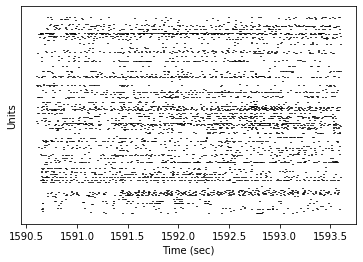

In [6]:
plot_raster(session.spike_times, start, end)
plt.xlabel('Time (sec)')
plt.ylabel('Units')
plt.tick_params(axis="y", labelleft=False, left=False)
plt.show()


### spontaneous activity

In [7]:
spon = session.stimulus_presentations.loc[
    session.stimulus_presentations["stimulus_name"] == "spontaneous_activity", 
    ["start_time", "stop_time"]
]
spon_start, spon_end = spon.iloc[3].values

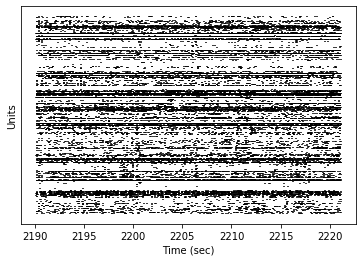

In [8]:
plot_raster(session.spike_times, spon_start, spon_end)
plt.xlabel('Time (sec)')
plt.ylabel('Units')
plt.tick_params(axis="y", labelleft=False, left=False)
plt.show()

In [ ]:
# arrange by firing-rate

by_fr = session.units.sort_values(by="firing_rate", ascending=False)
spike_times_by_firing_rate = {
    uid: session.spike_times[uid] for uid in by_fr.index.values
}
#plot_raster(spike_times_by_firing_rate, start, end)
plot_raster(spike_times_by_firing_rate, spon_start, spon_end)
plt.show()

## arrange the spontaneous activity according to the number of spikes (EXERCISE-WALKTHROUGH)

Comments: 1) remove hide the quality column; 2) remove sampling rate column - it is the same! 3) remove valid_data

In [9]:
session.units.sort_values(by="firing_rate", ascending=False)

,firing_rate,isi_violations,local_index_unit,peak_channel_id,quality,snr,channel_local_index,structure_acronym,structure_id,probe_horizontal_position,probe_id,probe_vertical_position,valid_data,probe_description,location,sampling_rate
unit_id,,,,,,,,,,,,,,,,
849863666,61.721757,0.396491,34,849862930,good,6.181049,50,MB,313.0,59,805579738,520,True,probeB,,30000.0
849859986,57.216175,0.377878,63,849859200,good,2.667946,54,TH,549.0,59,805579749,560,True,probeE,,30000.0
849862586,48.380680,0.478456,202,849861966,good,1.053274,276,VISp,385.0,43,805579741,2780,True,probeC,,30000.0
849858796,47.876740,0.339305,40,849858046,good,4.189728,49,TH,549.0,11,805579753,500,True,probeF,,30000.0
849858780,46.943069,0.444439,32,849858024,good,1.792003,38,TH,549.0,59,805579753,400,True,probeF,,30000.0
849858744,44.362515,0.371696,14,849857984,good,6.865120,18,TH,549.0,59,805579753,200,True,probeF,,30000.0
849857532,43.949894,0.255526,4,849856772,good,5.274026,8,TH,549.0,43,805579734,100,True,probeA,,30000.0
849859904,43.526920,0.429703,22,849859128,good,3.645981,18,TH,549.0,59,805579749,200,True,probeE,,30000.0
849862474,42.726156,0.560464,146,849861800,good,7.075353,193,CA,375.0,11,805579741,1940,True,probeC,,30000.0


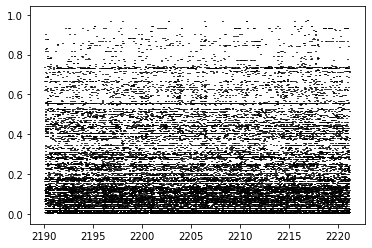

# Unit QC metrics (WALK-THROUGH)

In [11]:
session.units.head()

,firing_rate,isi_violations,local_index_unit,peak_channel_id,quality,snr,channel_local_index,structure_acronym,structure_id,probe_horizontal_position,probe_id,probe_vertical_position,valid_data,probe_description,location,sampling_rate
unit_id,,,,,,,,,,,,,,,,
849857524,1.821709,5.442067,0,849856756,good,0.606343,0,TH,549.0,43,805579734,20,True,probeA,,30000.0
849857526,12.607066,0.145777,1,849856760,good,5.457787,2,TH,549.0,59,805579734,40,True,probeA,,30000.0
849857528,4.320684,0.557281,2,849856764,good,1.446961,4,TH,549.0,43,805579734,60,True,probeA,,30000.0
849857530,7.992601,1.098819,3,849856764,good,0.643716,4,TH,549.0,43,805579734,60,True,probeA,,30000.0
849857534,1.081308,3.214073,5,849856774,good,3.633457,9,TH,549.0,11,805579734,100,True,probeA,,30000.0


In [12]:
just_params = session.units.loc[:, ["structure_acronym", "probe_id","firing_rate", "isi_violations", "snr",'probe_vertical_position']]
just_params.head()

,structure_acronym,probe_id,firing_rate,isi_violations,snr,probe_vertical_position
unit_id,,,,,,
849857524,TH,805579734,1.821709,5.442067,0.606343,20
849857526,TH,805579734,12.607066,0.145777,5.457787,40
849857528,TH,805579734,4.320684,0.557281,1.446961,60
849857530,TH,805579734,7.992601,1.098819,0.643716,60
849857534,TH,805579734,1.081308,3.214073,3.633457,100


In [13]:
just_params.sort_values(by="probe_id").head()

,structure_acronym,probe_id,firing_rate,isi_violations,snr,probe_vertical_position
unit_id,,,,,,
849857524,TH,805579734,1.821709,5.442067,0.606343,20
849857784,VISam,805579734,1.713041,2.990136,3.408776,2840
849857786,VISam,805579734,7.977562,0.075013,0.955393,2840
849857782,VISam,805579734,9.761802,0.114865,2.385971,2840
849857796,VISam,805579734,6.058269,0.280780,1.739655,2840


### describe what is the isi violation? write the down the equation for that!
Metrics

1) ISI violation: equation, then plot spike train with the clear spike violation!
2) from Josh: get the ISI, FR etc as metrics where the data is good! what are the thresholds for the good data? SNR + ISI violations

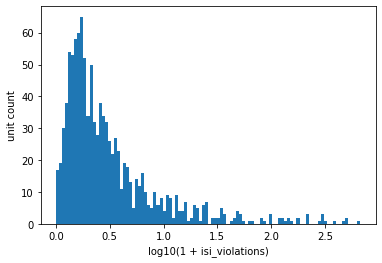

In [14]:
plt.subplots()

plt.hist(np.log10(1 + just_params["isi_violations"].values), bins=100)
plt.xlabel('log10(1 + isi_violations)')
plt.ylabel('unit count')
plt.show()

In [15]:
# really good units!

real_good_units = just_params[
    (just_params["isi_violations"] < 0.1)
    & (just_params["snr"] > 2)
]
print(real_good_units.shape[0])

11


In [16]:
# plot the structure names

session.units["structure_acronym"].unique()

array(['TH', 'DG', 'CA', 'VISam', 'MB', 'VISpm', 'VISp', 'VISl', 'VISal',
       'VISrl'], dtype=object)

# plot the distribution of the probe vertical positions

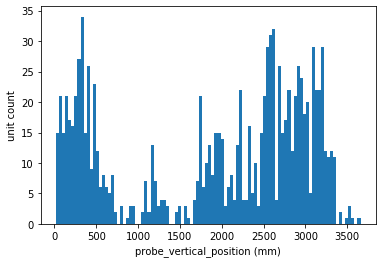

In [17]:


plt.subplots()

plt.hist(just_params["probe_vertical_position"].values, bins=100)
plt.xlabel('probe_vertical_position (mm)')
plt.ylabel('unit count')
plt.show()

# plot the firing rate of the units with regards to the structures (Exersize-Walkthrough)

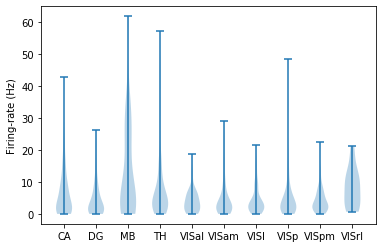

In [18]:
gb = session.units.groupby("structure_acronym")

structures = []
data = []
for group in gb:
    structure, current_data = group
    structures.append(structure)
    data.append(current_data["firing_rate"].values)

axs = plt.gca()
    
plt.violinplot(data)

axs.set_xticks(np.arange(len(structures))+1)
axs.set_xticklabels(structures)
plt.ylabel('Firing-rate (Hz)')
plt.show()


# plot the average waveforms for differnt units (Exersize-Waveforms)

In [19]:
type(session.mean_waveforms)

dict

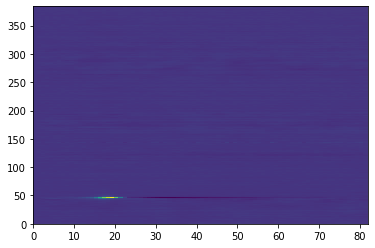

In [20]:
unit = session.units.index.values[400]
wf = session.mean_waveforms[unit]

fig, ax = plt.subplots()
plt.pcolormesh(wf)

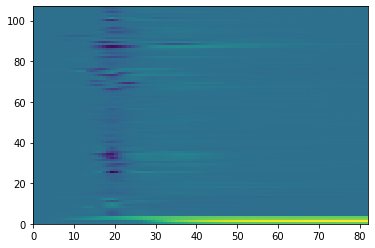

In [21]:
fig, ax = plt.subplots()

th_unit_ids = session.units[session.units["structure_acronym"] == "DG"].index.values

peak_waveforms = []

for unit_id in th_unit_ids:

    peak_ch = session.units.loc[unit_id, "peak_channel_id"]
    unit_mean_waveforms = session.mean_waveforms[unit_id]

    peak_waveforms.append(unit_mean_waveforms.loc[{"channel_id": peak_ch}])
    
    
time_domain = unit_mean_waveforms["time"]

peak_waveforms = np.array(peak_waveforms)
plt.pcolormesh(peak_waveforms)

### narrative: large scale data hence some units do not look good
so, one should be careful with the qc metrics

In [22]:
# apply pca to the averaged waveforms

pca = decomposition.PCA(n_components=2)

pca.fit(peak_waveforms)


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

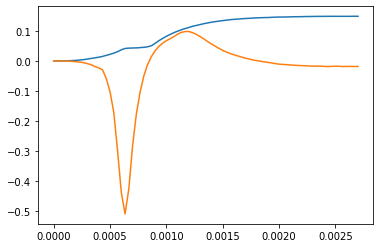

In [23]:
# 2 characteristic components

plt.plot(time_domain, pca.components_.T)

In [24]:
pca.explained_variance_ratio_

array([0.89120241, 0.06117076])

# plot the cross-correllogram for the spontaneous activity

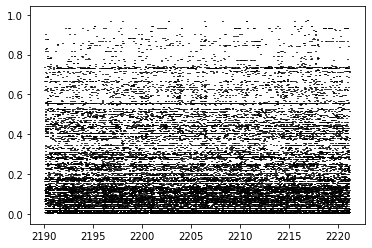

In [25]:
# arrange by firing-rate

by_fr = session.units.sort_values(by="firing_rate", ascending=False)
spike_times_by_firing_rate = {
    uid: session.spike_times[uid] for uid in by_fr.index.values
}
#plot_raster(spike_times_by_firing_rate, start, end)
plot_raster(spike_times_by_firing_rate, spon_start, spon_end)
plt.show()

In [26]:
spon.head()

,start_time,stop_time
stimulus_presentation_id,,
0,29.229048,89.295798
3646,1001.357974,1290.349498
3797,1588.848986,1590.600498
3998,2190.118333,2221.144258
21999,2821.646438,2851.671498


In [51]:
first_spon_id = spon.index.values[0]
first_spon_duration = spon.loc[first_spon_id, "stop_time"] - spon.loc[first_spon_id, "start_time"]

# 1 - sec
time_step = 1 / 100
time_domain = np.arange(0.0, first_spon_duration + time_step, time_step)

histograms = session.presentationwise_spike_counts(
    bin_edges=time_domain,
    stimulus_presentation_ids=[first_spon_id],
    unit_ids=None
)
histograms

<xarray.Dataset>
Dimensions:                          (stimulus_presentation_id: 1, time_relative_to_stimulus_onset: 6007, unit_id: 1076)
Coordinates:
  * stimulus_presentation_id         (stimulus_presentation_id) int64 0
  * time_relative_to_stimulus_onset  (time_relative_to_stimulus_onset) float64 0.005 ... 60.06
  * unit_id                          (unit_id) int64 849857524 ... 849859070
Data variables:
    spike_counts                     (stimulus_presentation_id, time_relative_to_stimulus_onset, unit_id) uint16 0 ... 0

In [52]:
mean_histograms = histograms.mean(dim="stimulus_presentation_id")

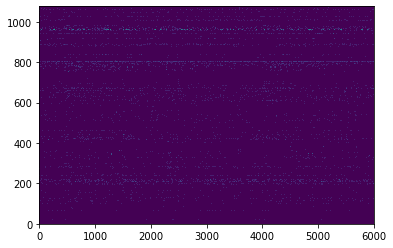

In [53]:
plt.pcolormesh(mean_histograms["spike_counts"].T)

In [54]:
mean_histograms["spike_counts"]

<xarray.DataArray 'spike_counts' (time_relative_to_stimulus_onset: 6007, unit_id: 1076)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * time_relative_to_stimulus_onset  (time_relative_to_stimulus_onset) float64 0.005 ... 60.06
  * unit_id                          (unit_id) int64 849857524 ... 849859070

In [65]:
# test code for correlation

spike_counts = mean_histograms.spike_counts.values
time = mean_histograms["time_relative_to_stimulus_onset"]

hist_train_1=spike_counts[:,0]
hist_train_2=spike_counts[:,1]

Text(0.5, 0, 'Time (sec)')

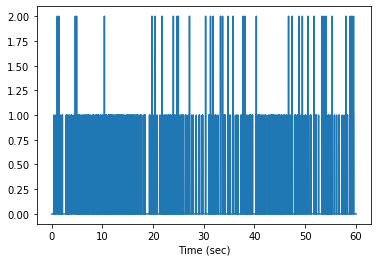

In [62]:
# plot one hist-binned spike train

plt.plot(time, hist_train_1)
plt.xlabel('Time (sec)')

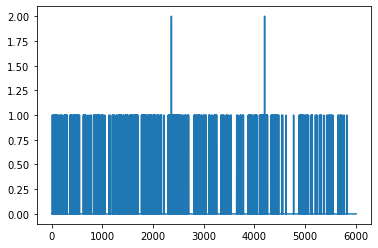

In [58]:
plt.plot(hist_train_2)

In [63]:
np.correlate(hist_train_1,hist_train_2)

array([39.])

In [66]:
num_units = spike_counts.shape[1]

correlations = np.zeros((num_units, num_units))

for ii in range(num_units):
    for jj in range(ii, num_units):
        correlations[ii, jj] = np.correlate(spike_counts[:, ii], spike_counts[:, jj])

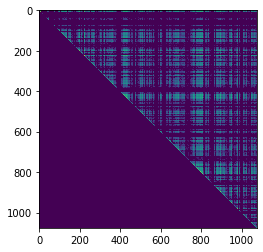

In [68]:
plt.imshow(np.log10(correlations+1))